# Red Neuronal 1 con TensorFLow y Keras

Importamos las librerias necesarias

In [53]:
import tensorflow as tf
import keras
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Importo el Dataframe de train ajustado 

In [2]:
df = pd.read_csv("../DF_Dummis_RN/df_trainDUMMIES.csv")

Verifico las columnas 

In [3]:
df.columns

Index(['Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [4]:
df.shape

(410000, 22)

In [5]:
df.head()

,Long_duration,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,4,2
1,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,3,0
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,2
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,3,1
4,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,7,1


Escojo una muestra de 2000 valores aleatorios del total de los datos, separo en <font color='yellow'>df_SampleEntrada</font> y <font color='yellow'>df_SampleSalida</font> donde se encuentra la columna  'Long_duration' que contiene el dato que se quiere entrenar a para poder predecrilo

In [8]:
df_Sample = df.sample(n = 2000)

In [9]:
df_SampleEntrada = df_Sample[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [10]:
df_SampleSalida = df_Sample['Long_duration']

Creamos la red neuronal y entrenamos la red neuronal, tiene 15 capas ocultas y se entreno con OneHotEncoder de las columnas <font color='yellow'>'Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female','gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes', 'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity' </font>



In [11]:
oculta1 = tf.keras.layers.Dense(units = 22 , input_shape=(21,))
oculta2 = tf.keras.layers.Dense(units = 21)
oculta3 = tf.keras.layers.Dense(units = 25)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

Seleccionamos el optimizador Adam porque Según Kingma et al., 2014 , el método es _" computacionalmente eficiente, requiere poca memoria, es invariable al cambio de escala diagonal de gradientes y es adecuado para problemas que son grandes en términos de datos/parámetros "_.
> La tasa de aprendizaje se establece en 0.00001, pues es la optima para lograr el aprendizaje del modelo

In [12]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_error'
)

In [13]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_SampleEntrada.values, df_SampleSalida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
63/63 [==============================] - 5s 7ms/step - loss: 1.1961
Epoch 2/500
63/63 [==============================] - 0s 5ms/step - loss: 0.7695
Epoch 3/500
63/63 [==============================] - 0s 5ms/step - loss: 0.5536
Epoch 4/500
63/63 [==============================] - 0s 5ms/step - loss: 0.4349
Epoch 5/500
63/63 [==============================] - 0s 6ms/step - loss: 0.3663
Epoch 6/500
63/63 [==============================] - 0s 5ms/step - loss: 0.3270
Epoch 7/500
63/63 [==============================] - 0s 6ms/step - loss: 0.3045
Epoch 8/500
63/63 [==============================] - 0s 6ms/step - loss: 0.2913
Epoch 9/500
63/63 [==============================] - 0s 6ms/step - loss: 0.2828
Epoch 10/500
63/63 [==============================] - 0s 6ms/step - loss: 0.2766
Epoch 11/500
63/63 [==============================] - 0s 6ms/step - loss: 0.2717
Epoch 12/500
63/63 [==============================] - 0s 5ms/step - loss: 0.2675
Epoch 13/

Vemos el historial de perdida del modelo

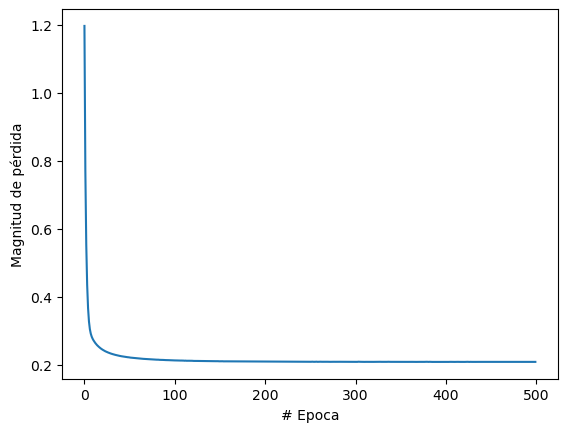

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


Vemos el peso que le otrogó el modelo a cada una de las capas

In [15]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(oculta5.get_weights())
print(oculta6.get_weights())
print(oculta7.get_weights())
print(oculta8.get_weights())
print(oculta9.get_weights())
print(oculta10.get_weights())
print(oculta11.get_weights())
print(oculta12.get_weights())
print(oculta13.get_weights())
print(oculta14.get_weights())
print(oculta15.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 2.61029094e-01, -3.68784994e-01,  9.56520215e-02,
         2.92292982e-01,  2.47226417e-01,  4.01037782e-01,
         1.27308130e-01,  2.84557521e-01, -1.77281760e-02,
         7.32878968e-02,  1.56301290e-01, -3.35577846e-01,
         2.21161112e-01,  3.26024532e-01, -1.49108693e-01,
         2.07106352e-01,  3.24641705e-01, -3.64728779e-01,
         2.13187560e-01,  9.03518200e-02, -3.24621290e-01,
         3.59053463e-01],
       [ 7.76921287e-02,  8.97825435e-02, -1.44588068e-01,
         1.67486295e-01,  1.73709318e-01, -1.70123875e-01,
        -2.56001562e-01,  2.62089461e-01,  1.16364628e-01,
        -1.75632417e-01,  2.98773855e-01, -4.29544300e-01,
         1.95748106e-01,  2.38125458e-01,  3.36913109e-01,
         3.59630018e-01,  4.00377899e-01, -3.49099696e-01,
        -3.35662305e-01, -6.94431141e-02, -2.47024834e-01,
         2.80525982e-01],
       [-8.98978263e-02,  4.19098837e-03,  3.66175085e-01,
        -2.89743543e-01, -3.1361

Seleccionamos los datos de DF con lo que vamos a hacer la predicción y la respuesta de estos para probar el modelo posteriormente

In [16]:
df_prediccion = df.sample(n = 90000)

In [17]:
df_prediccion_ENTRADA = df_prediccion[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [19]:
df_prediccion_CORRECTAS = df_prediccion['Long_duration']

Probamos el el modelo que entrenamos

In [21]:
print("Predición de unos datos")
resultado_Prueba = modelo.predict(df_prediccion_ENTRADA.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [56]:
resultado_prueba = np.round(resultado_Prueba, decimals=0)

In [57]:
print(classification_report(df_prediccion_CORRECTAS, resultado_prueba))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30     33905
           1       0.64      0.82      0.72     56095

    accuracy                           0.60     90000
   macro avg       0.53      0.52      0.51     90000
weighted avg       0.56      0.60      0.56     90000



In [58]:
roc_auc_score(y_true= df_prediccion_CORRECTAS, y_score= resultado_prueba)

0.5237217739477734

Hacemos prediciones con la red neuronal entrenada

In [39]:
df_test = pd.read_csv("../DF_Dummis_RN/df_test_DUMMIES.csv")

Selecciono los datos con los que voy a hacer la predicción

In [41]:
df_test = df_test[['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity']]

In [42]:
print("Predición de unos datos")
resultado = modelo.predict(df_test.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [43]:
resultado = np.round(resultado, decimals=0)

In [44]:
respuesta = pd.DataFrame(resultado, columns=['pred'])
respuesta.head()

,pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [46]:
respuesta['pred'] = respuesta['pred'].astype(int)

In [47]:
respuesta.head()

,pred
0,1
1,1
2,1
3,1
4,1


In [48]:
from pathlib import Path
filepath = Path('../Predicciones/prediccion_RN_1.csv')
respuesta.to_csv(filepath,index=False)

Guardamos el modelo entrenado

In [49]:
filepath = Path('../Modelos/RN_1.h5')

In [51]:
modelo.save(filepath)